# Explore Bend Cluster Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
csv_file = 'merged_clusters.csv'

df = pd.read_csv(csv_file)

print("Number of rows in the original DataFrame:", len(df))

Number of rows in the original DataFrame: 569


In [7]:
df.describe()

,start_idx,end_idx,avg_angle,n_points,avg_speed,start_frame,10 meters frame,20 meters frame,30 meters frame,40 meters frame,50 meters frame,75 meters frame,100 meters frame
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,816.367311,853.191564,0.437478,25.845343,31.282847,2443.866432,2413.416520,2388.727592,2367.115993,2299.511424,2192.374341,1931.708260,1663.534271
std,525.110938,524.098616,13.956618,32.940685,16.954901,1572.410435,1573.219628,1571.987497,1570.376468,1584.669502,1607.671068,1659.394608,1681.145260
min,2.000000,4.000000,-106.877263,1.000000,0.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,365.000000,418.000000,-5.213529,5.000000,21.390000,1093.000000,1072.000000,1051.000000,1027.000000,959.000000,755.000000,248.000000,-1.000000
50%,771.000000,814.000000,0.044615,12.000000,31.970000,2307.000000,2265.000000,2244.000000,2217.000000,2115.000000,2016.000000,1708.000000,1255.000000
75%,1257.000000,1309.000000,4.950000,33.000000,41.010000,3764.000000,3719.000000,3695.000000,3677.000000,3548.000000,3443.000000,3269.000000,3029.000000
max,1793.000000,1803.000000,111.650000,180.000000,71.500000,5370.000000,5346.000000,5328.000000,5316.000000,5304.000000,5292.000000,5259.000000,5229.000000


# plot speeds

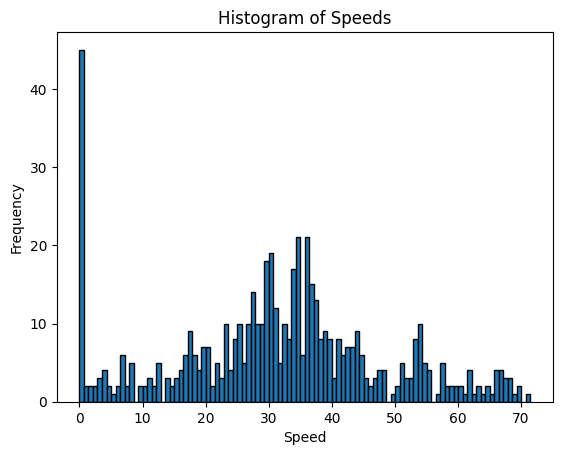

In [10]:
speeds = df['avg_speed'].tolist()

histogram = {}
for speed in speeds:
    if speed in histogram:
        histogram[speed] += 1
    else:
        histogram[speed] = 1

plt.hist(speeds, bins=100, edgecolor='black')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Speeds')
plt.show()

In [11]:
threshold = 15

# remove records under the threshold

df = df[df['avg_speed'] >= threshold]
print("Number of rows in the DataFrame after removing records under the threshold:", len(df))    

Number of rows in the DataFrame after removing records under the threshold: 474


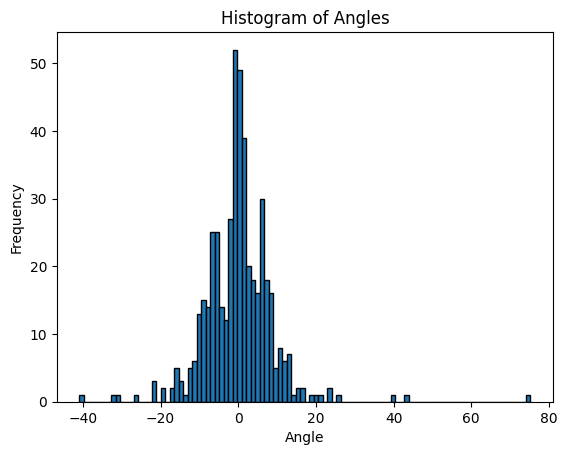

In [ ]:

# plot angle hist
plt.hist(df['avg_angle'], bins=100, edgecolor='black')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.title('Histogram of Angles')
plt.show()

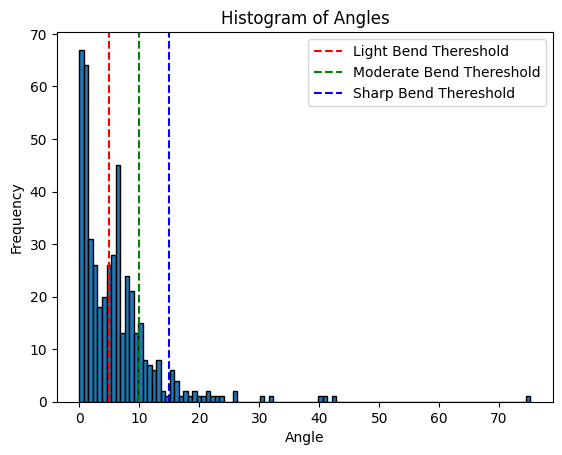

In [21]:
# plot angle hist
angles = df['avg_angle'].tolist()
abs_angles = [abs(angle) for angle in angles]

light = 5
Moderate = 10
Sharp = 15

plt.hist(abs_angles, bins=100, edgecolor='black')
plt.xlabel('Angle')
plt.ylabel('Frequency')

plt.axvline(x=light, color='r', linestyle='--', label='Light Bend Thereshold')
plt.axvline(x=Moderate, color='g', linestyle='--', label='Moderate Bend Thereshold')
plt.axvline(x=Sharp, color='b', linestyle='--', label='Sharp Bend Thereshold')

plt.legend()
plt.title('Histogram of Angles')
plt.show()

Number of cells with 10 meters frame > 0: 465
Number of cells with 20 meters frame > 0: 461
Number of cells with 30 meters frame > 0: 457
Number of cells with 40 meters frame > 0: 444
Number of cells with 50 meters frame > 0: 428
Number of cells with 75 meters frame > 0: 377
Number of cells with 100 meters frame > 0: 325


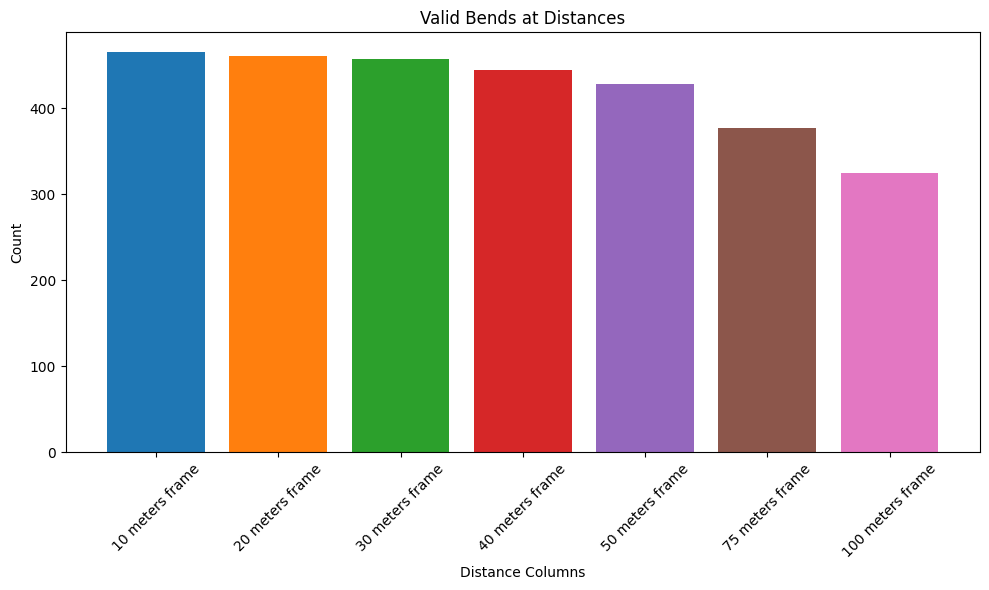

In [29]:
columns = df.columns
distances_columns = [col for col in columns if 'meters' in col]

# cound cells with distance > 0

for col in distances_columns:
    count = df[df[col] > 0].shape[0]
    print(f"Number of cells with {col} > 0: {count}")


# plot distance counts with col names
plt.figure(figsize=(10, 6))
for col in distances_columns:
    count = df[df[col] > 0].shape[0]
    plt.bar(col, count)
plt.xlabel('Distance Columns')
plt.ylabel('Count')
plt.title('Valid Bends at Distances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()